In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import ion_gen as ig
import compute as cm

In [2]:
sys = ["Na-F","F-Water"]

decomp = ["Total"]

QM = {
    "MP2": decomp,
#     "ALMO": decomp,
#     "SAPT": decomp,
}

FF = {
    "AMOEBA": decomp,
    "AMOEBAF": decomp,
}

In [3]:
cwd = os.getcwd()
os.chdir(f"{cwd}/..")

In [4]:
# read in data

QM_methods = cm.getQMMethods(QM)

FF_methods = cm.getFFMethods(FF)


In [5]:
def plot(sys, QM, FF):
    for key in sys:
        intClass = cm.intClass[key]
        
        # 1, 2
        if intClass in [1, 2]:
            index = ig.index[key]
            factor = ig.allTwoBody[key]
            QM_sub = {}
            for method,df in QM_methods.items():
                subset = df[df['Filename'].str.startswith(str(index))]
                QM_sub[method] = subset
            FF_sub = {}
            for method,df in FF_methods.items():
                subset = df[df['Filename'].str.startswith(str(index))]
                FF_sub[method] = subset
            if intClass == 1:
                eq = ig.catAnEquil[key]
            elif intClass == 2:
                eq = ig.ionWaterEquil[key]
            x = [eq*f for f in factor]
            plt.figure(figsize=(12,7))
            for qm,etyp in QM.items():
                for e in etyp:
                    plt.plot(x, QM_sub[qm][e], label=f"{qm}-{e}", linewidth=2.5, marker="o")
            for ff,etyp in FF.items():
                for e in etyp:
                    plt.plot(x, FF_sub[ff][e], label=f"{ff}-{e}", linewidth=2.5, marker="o")
            plt.title(f'{key} Energy', fontsize=14)
            plt.xlabel('Angs', fontsize=14)
            plt.ylabel('kcal/mol', fontsize=14)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.axvline(x=eq, color='black', linestyle='--')
            plt.legend(fontsize=14)
        
        # 4
        elif intClass == 4:
            index = ig.index[key]
            QM_sub = {}
            for method,df in QM_methods.items():
                subset = df[df['Filename'].str.startswith(str(index))]
                QM_sub[method] = subset
            FF_sub = {}
            for method,df in FF_methods.items():
                subset = df[df['Filename'].str.startswith(str(index))]
                FF_sub[method] = subset
            x = []
            y = []
            for qm,etyp in QM.items():
                for e in etyp:
                    x.append(f"{qm}-{e}")
                    y.append(float(QM_sub[qm][e]))
            for ff,etyp in FF.items():
                for e in etyp:
                    x.append(f"{ff}-{e}")
                    y.append(float(FF_sub[ff][e]))
            plt.figure(figsize=(12,7))
            plt.bar(x, y)
            plt.title(f'{key} Energy', fontsize=14)
            plt.ylabel('kcal/mol', fontsize=14)
        
    return

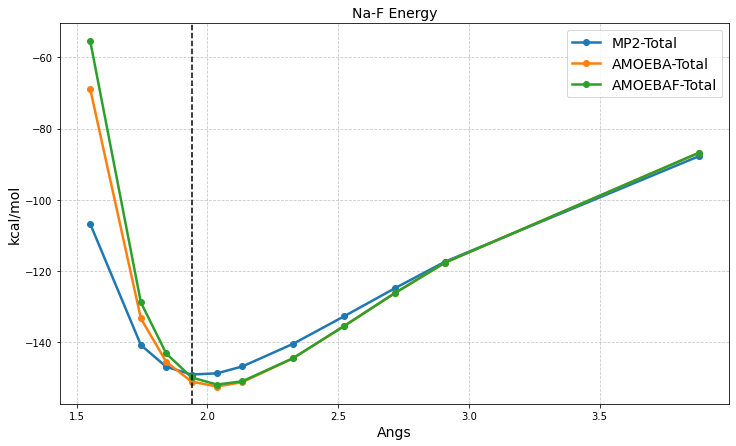

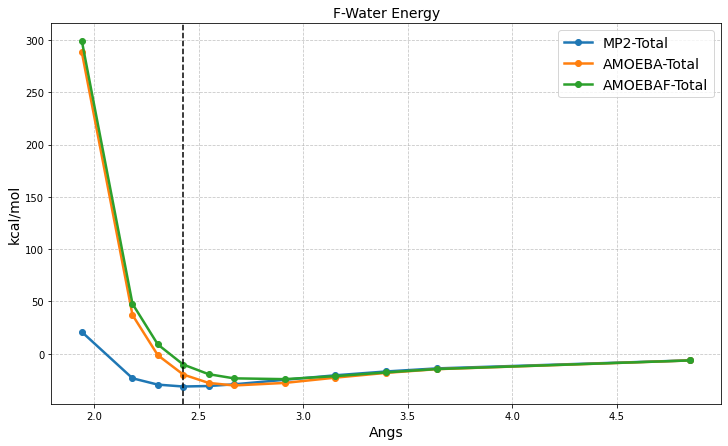

In [6]:
plot(sys, QM, FF)